In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('remote_work_productivity.csv')
display(df.head())

,Employee_ID,Age,Years_Experience,WFH_Days_Per_Week,Gender,Education_Level,Marital_Status,Has_Children,Location_Type,Department,...,Quality_Score,Innovation_Score,Efficiency_Rating,Meetings_Per_Week,Commute_Time_Minutes,Job_Satisfaction,Stress_Level,Work_Life_Balance,Survey_Date,Response_Quality
0,EMP0001,39,10,2,Female,Associate Degree,Married,Yes,Urban,Product,...,58.1,52.1,72.1,4,48,55.9,6,8,2024-04-05,Medium
1,EMP0002,33,4,5,Female,Master Degree,Married,No,Urban,Customer Success,...,93.3,77.9,89.5,12,0,96.1,3,8,2024-01-29,High
2,EMP0003,40,3,3,Male,PhD,Single,Yes,Rural,Operations,...,84.7,63.2,95.0,15,24,90.4,5,6,2024-01-18,High
3,EMP0004,48,14,3,Male,Bachelor Degree,Married,Yes,Urban,Finance,...,67.8,82.5,95.0,8,8,100.0,10,5,2024-04-18,High
4,EMP0005,32,6,5,Male,High School,Divorced,Yes,Rural,Engineering,...,86.4,67.5,95.0,10,0,100.0,3,4,2024-02-19,High


In [6]:
df.drop(columns=["Employee_ID"], inplace=True)


In [7]:
# Handle missing values first
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].mean())

In [8]:
ordinal_cols = ["Education_Level", "Job_Level", "Manager_Support_Level"]
nominal_cols = ["Gender","Marital_Status","Has_Children","Location_Type",
                "Department","Company_Size","Industry",
                "Home_Office_Quality","Internet_Speed_Category",
                "Team_Collaboration_Frequency",  "Response_Quality"]


In [9]:
edu_order = {"High School":1, "Associate Degree":2, "Bachelor Degree":3,
             "Master Degree":4, "Professional Degree":5, "PhD":6}
job_order = {"Junior":1, "Mid-Level":2, "Senior":3, "Lead":4 , "Manager":5, "Director":6}
support_order = {"Very Low":1, "Low":2, "Moderate":3, "High":4, "Very High":5}

In [10]:
df["Education_Level"] = df["Education_Level"].map(edu_order)
df["Job_Level"] = df["Job_Level"].map(job_order)
df["Manager_Support_Level"] = df["Manager_Support_Level"].map(support_order)

In [11]:
df_encoded = pd.get_dummies(df, columns=nominal_cols, drop_first=False)

In [12]:
print("Shape before encoding:", df.shape)
print("Shape after encoding:", df_encoded.shape)

Shape before encoding: (1500, 29)
Shape after encoding: (1500, 71)


In [13]:
df_encoded

,Age,Years_Experience,WFH_Days_Per_Week,Education_Level,Job_Level,Work_Hours_Per_Week,Manager_Support_Level,Productivity_Score,Task_Completion_Rate,Quality_Score,...,Internet_Speed_Category_Slow (<25 Mbps),Internet_Speed_Category_Very Fast (100+ Mbps),Team_Collaboration_Frequency_Bi-weekly,Team_Collaboration_Frequency_Daily,Team_Collaboration_Frequency_Few times per week,Team_Collaboration_Frequency_Monthly,Team_Collaboration_Frequency_Weekly,Response_Quality_High,Response_Quality_Low,Response_Quality_Medium
0,39,10,2,2,2,41,2,52.2,56.6,58.1,...,False,True,False,False,True,False,False,False,False,True
1,33,4,5,4,3,52,3,81.5,70.8,93.3,...,False,True,False,False,False,True,False,True,False,False
2,40,3,3,6,2,43,3,82.2,81.9,84.7,...,False,False,False,False,True,False,False,True,False,False
3,48,14,3,3,5,45,4,75.6,70.2,67.8,...,False,True,False,True,False,False,False,True,False,False
4,32,6,5,1,3,42,1,98.0,98.2,86.4,...,False,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,53,5,5,4,3,36,3,78.5,89.7,84.1,...,False,False,False,False,False,False,True,True,False,False
1496,53,9,3,4,2,43,3,74.7,71.9,74.7,...,False,True,False,False,False,False,True,True,False,False
1497,45,2,4,2,1,51,5,88.6,92.9,88.4,...,False,False,False,False,False,False,True,True,False,False
1498,44,12,4,3,3,26,5,92.1,74.2,93.9,...,False,False,False,True,False,False,False,False,False,True


In [14]:
print(df_encoded.isnull().sum())


Age                                     0
Years_Experience                        0
WFH_Days_Per_Week                       0
Education_Level                         0
Job_Level                               0
                                       ..
Team_Collaboration_Frequency_Monthly    0
Team_Collaboration_Frequency_Weekly     0
Response_Quality_High                   0
Response_Quality_Low                    0
Response_Quality_Medium                 0
Length: 71, dtype: int64


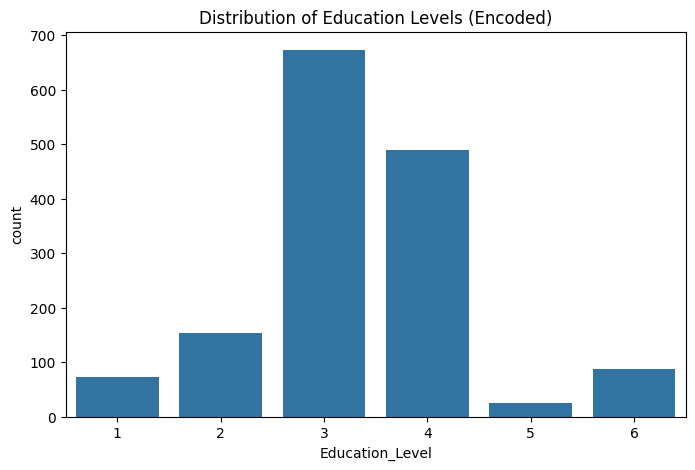

In [15]:
plt.figure(figsize=(8,5))
sns.countplot(x=df["Education_Level"])
plt.title("Distribution of Education Levels (Encoded)")
plt.show()

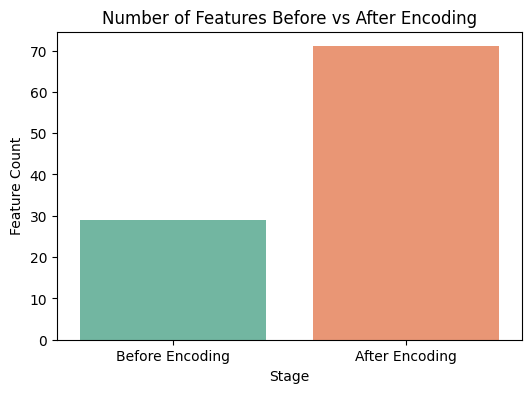

In [16]:
feature_counts = pd.DataFrame({
    "Stage": ["Before Encoding", "After Encoding"],
    "Features": [df.shape[1], df_encoded.shape[1]]
})

plt.figure(figsize=(6,4))
sns.barplot(
    data=feature_counts,
    x="Stage",
    y="Features",
    hue="Stage",
    palette="Set2",
    legend=False
)
plt.title("Number of Features Before vs After Encoding")
plt.ylabel("Feature Count")
plt.show()


In [19]:
bool_cols = df_encoded.select_dtypes(include='bool').columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)

df_encoded.to_csv("IT24103494_encoded.csv", index=False)